# Scrap the website

In [896]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

## Cleaning the dataset

In [897]:
statement = pd.read_csv("statement.csv")
statement.head()

,statement,age,date,firstname,lastname,race,url
0,"Date of Execution: July 17, 2018 Offender: Ch...",34,7/17/2018,Christopher,Young,Black,dr_info/youngchristopherlast.html
1,"Date of Execution: June 27, 2018 Offender: Da...",66,6/27/2018,Danny,Bible,White,dr_info/bibledannylast.html
2,"Date of Execution:May 16,2018Offender:Juan Edw...",37,5/16/2018,Juan,Castillo,Hispanic,dr_info/castillojuanlast.html
3,"Date of Execution: April 25, 2018 Offender: D...",31,4/25/2018,Erick,Davila,Black,dr_info/davilaericklast.html
4,"Date of Execution: March 27, 2018 Offender: R...",38,3/27/2018,Rosendo,"Rodriguez, III",Histpanic,dr_info/rodriguezrosendolast.html


In [898]:
statement['year'] = statement['date'].str.extract("(\d\d\d\d)")

In [899]:
statement['statement'][3]

'Date of Execution: April 25, 2018 Offender:  Davila, Erick Daniel  Last Statement:  Yes, I would like to say nephew it burns huh.\xa0  You know I might have lost the fight but I’m still a soldier.\xa0 I still  love you all.\xa0 To my supporters and family y’all hold it down.\xa0 Ten  Toes down right. That’s all.'

In [900]:
statement['statement'] = statement['statement'].str.extract("Last Statement:\s?(.*)")

In [901]:
statement['statement']

0      l want to make sure the Patel family knows I l...
1                                                       
2      To everyone that has been there for me you kno...
3       Yes, I would like to say nephew it burns huh....
4       First I  would like to say I have been here s...
5       No, Well, Hi Mary Jean. See y’all later. Go a...
6      First I would like to praise my Lord Jesus  Ch...
7       I’d like to take a moment to say I’m sorry.  ...
8      This is my statement:  My final words.  First,...
9      I just want to let everyone in here to know I ...
10     First and foremost I'd like to say, "Justice h...
11     Yes, I do, Grace Kehler is that you? I have gi...
12     “Yes sir, I would first like to say to the San...
13     Yes, I made peace with God. I hope y'all make ...
14                                                  None
15     I don't have anything to say, you can proceed ...
16     I just want to tell my family thank you, my mo...
17     I would like to thank ev

In [902]:
statement.drop(['date', 'url'], axis=1, inplace=True)

In [903]:
statement.head()

,statement,age,firstname,lastname,race,year
0,l want to make sure the Patel family knows I l...,34,Christopher,Young,Black,2018
1,,66,Danny,Bible,White,2018
2,To everyone that has been there for me you kno...,37,Juan,Castillo,Hispanic,2018
3,"Yes, I would like to say nephew it burns huh....",31,Erick,Davila,Black,2018
4,First I would like to say I have been here s...,38,Rosendo,"Rodriguez, III",Histpanic,2018


In [904]:
statement['statement']

0      l want to make sure the Patel family knows I l...
1                                                       
2      To everyone that has been there for me you kno...
3       Yes, I would like to say nephew it burns huh....
4       First I  would like to say I have been here s...
5       No, Well, Hi Mary Jean. See y’all later. Go a...
6      First I would like to praise my Lord Jesus  Ch...
7       I’d like to take a moment to say I’m sorry.  ...
8      This is my statement:  My final words.  First,...
9      I just want to let everyone in here to know I ...
10     First and foremost I'd like to say, "Justice h...
11     Yes, I do, Grace Kehler is that you? I have gi...
12     “Yes sir, I would first like to say to the San...
13     Yes, I made peace with God. I hope y'all make ...
14                                                  None
15     I don't have anything to say, you can proceed ...
16     I just want to tell my family thank you, my mo...
17     I would like to thank ev

### Use TF to do the analysis

In [905]:
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

In [906]:
def tokenize(s):
    blob = TextBlob(s.lower())

    words = [token for token in blob.words if len(token)>2]
    return words  

In [907]:
def doc2vec_count(s):
    tokens = tokenize(s)
    vec = {}
    for t in tokens:
#if there is not t in dic, return the 0 
        vec[t] = vec.get(t, 0) + 1
    return vec

In [908]:
from nltk.corpus import stopwords

In [909]:
stop = stopwords.words('english')
stop.append("new")
stop.append("like")
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('mr.')
stop.append("'ve")
stop.append("'re")
stop.append("its")
stop.append("i'd")
stop.append("'ll")
stop.append("i'")
stop = set(stop)

In [910]:
# vectorizer = TfidfVectorizer(stop_words=stop, tokenizer=tokenize)
# matrix = vectorizer.fit_transform(statement['statement'])


# tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
# tfidf.head()

In [911]:
# tfidf.shape

In [912]:
def print_sorted_vector(v):
    # this "lambda" thing is an anonymous function, google me to unluck bonus coding knowledge
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
#     sorted_list = sorted_list[:20]
    print('\n'.join([str(x) for x in sorted_list]))
    return sorted_list

In [913]:
# tfidf_sum = tfidf.sum()
# length = math.sqrt(sum([x*x for x in tfidf_sum]))
# total_vec = tfidf_sum / length

In [914]:
#df = pd.DataFrame(print_sorted_vector(total_vec),columns=['word','tfidf'])

In [915]:
number = statement.year.value_counts().reset_index().sort_values(by='index')
# number.reset_index().drop(columns= ['level_0'])

In [916]:
number = number.rename(columns= {'year':'number', 'index':'year'}).reset_index()

In [917]:
number.head()

,index,year,number
0,35,1982,1
1,32,1984,3
2,27,1985,6
3,23,1986,10
4,28,1987,6


In [918]:
number = number.drop(['index'], axis=1)

In [919]:
number.head()

,year,number
0,1982,1
1,1984,3
2,1985,6
3,1986,10
4,1987,6


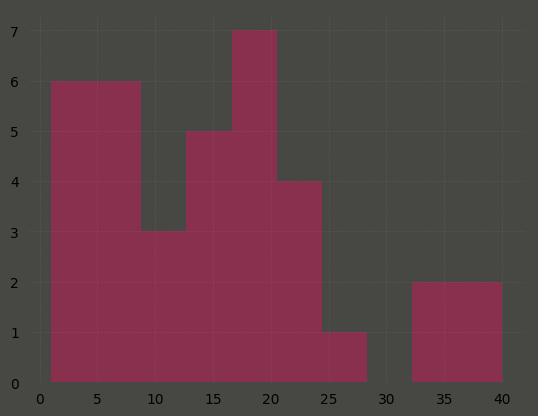

In [920]:
number.number.hist()

In [921]:
df2 = statement.groupby('year')['statement'].apply(' '.join).reset_index()

In [922]:
df2.head()

,year,statement
0,1982,"Statement to the Media: I, at this very moment..."
1,1984,"When asked if he had a last statement, he repl..."
2,1985,"D.J., Laurie, Dr. Wheat, about all I can say i..."
3,1986,This offender declined to make a last statemen...
4,1987,This offender declined to make a last statemen...


In [923]:
df3 = df2.merge(number, how='outer', on= 'year')

In [924]:
df3

,year,statement,number
0,1982,"Statement to the Media: I, at this very moment...",1
1,1984,"When asked if he had a last statement, he repl...",3
2,1985,"D.J., Laurie, Dr. Wheat, about all I can say i...",6
3,1986,This offender declined to make a last statemen...,10
4,1987,This offender declined to make a last statemen...,6
5,1988,This offender declined to make a last statemen...,3
6,1989,I want to say I hold no grudges. I hate no one...,4
7,1990,I just ask everybody I ever hurt or done anyth...,4
8,1991,"Let’s do it, man. Lock and load. Ain’t life a ...",5
9,1992,This offender declined to make a last statemen...,12


In [925]:
df3.shape

(36, 3)

In [926]:
# vectorizer = TfidfVectorizer(stop_words=stop, tokenizer=tokenize)
# matrix = vectorizer.fit_transform(df3['statement'])


# tfidf2 = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
# tfidf2.head()

In [927]:
# tfidf2.shape

In [928]:
# print_sorted_vector(tfidf2.iloc[0,:])

In [929]:
# df_1982 = pd.DataFrame(print_sorted_vector(tfidf2.iloc[0,:]),columns=['word','tfidf'])

In [930]:
#df_1982 = df_1982.head(15)

In [931]:
#df_1982['year'] = 1982

In [932]:
#df_all = pd.DataFrame(print_sorted_vector(total2_vec),columns=['word','tfidf'])

In [933]:
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize, vocabulary = ['god', 'jesus', 'muslim', 'christ', 'holy', 'allah', 'lord'])
matrix = vectorizer.fit_transform(df3['statement'])


result_religious = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
result_religious

,god,jesus,muslim,christ,holy,allah,lord
0,1,0,2,0,0,2,0
1,3,0,0,0,0,0,0
2,3,1,0,0,1,1,1
3,3,0,0,0,0,2,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1


In [934]:
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize)
matrix = vectorizer.fit_transform(df3['statement'])


result_all = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
result_all

,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,12:31b,13:13,...,younger,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [935]:
result_all.shape

(36, 3347)

In [936]:
result_nonreligious = result_all.drop(['god', 'jesus', 'muslim', 'christ', 'holy', 'allah', 'lord'], axis=1)

In [937]:
result_nonreligious.head()

,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,12:31b,13:13,...,younger,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [938]:
result_nonreligious_sum = result_nonreligious.sum(axis=1).reset_index()
result_nonreligious_sum.rename(columns={0:'nonreligious_word_tf'}, inplace=True)

In [939]:
result_nonreligious_sum.drop(['index'],axis=1,inplace=True)

In [940]:
result_nonreligious_sum.head()

,nonreligious_word_tf
0,33
1,131
2,187
3,106
4,40


In [941]:
number.head()

,year,number
0,1982,1
1,1984,3
2,1985,6
3,1986,10
4,1987,6


In [942]:
result_religious_sum = result_religious.sum(axis=1).reset_index()
result_religious_sum.rename(columns={0:'religious_word_tf'}, inplace=True)

In [943]:
result_religious_sum.drop(['index'],axis=1,inplace=True)

In [944]:
result_religious_sum

,religious_word_tf
0,5
1,3
2,7
3,5
4,0
5,0
6,1
7,0
8,0
9,1


In [945]:
result_all_sum = result_all.sum(axis=1).reset_index()
result_all_sum.rename(columns={0:'all_word_tf'}, inplace=True)

In [946]:
result_all_sum.drop(['index'],axis=1,inplace=True)

In [947]:
result_all_sum.head()

,all_word_tf
0,38
1,134
2,194
3,111
4,40


In [948]:
df_religious = pd.concat([result_religious_sum, result_nonreligious_sum, number,result_all_sum ], axis=1)

In [949]:
df_religious.head(10)

,religious_word_tf,nonreligious_word_tf,year,number,all_word_tf
0,5,33,1982,1,38
1,3,131,1984,3,134
2,7,187,1985,6,194
3,5,106,1986,10,111
4,0,40,1987,6,40
5,0,15,1988,3,15
6,1,34,1989,4,35
7,0,33,1990,4,33
8,0,37,1991,5,37
9,1,70,1992,12,71


In [950]:
df_religious['religious_word_per_person'] = df_religious['religious_word_tf'] / df_religious['number']

In [951]:
df_religious['religious_word_per_nonreligiousword'] = df_religious['religious_word_tf'] / df_religious['nonreligious_word_tf']

In [952]:
df_religious['religious_word_per_wholewords'] = df_religious['religious_word_tf']/df_religious['all_word_tf']

In [953]:
df_religious_filter = df_religious[df_religious['number'] > 9]

In [954]:
df_religious_filter.head()

,religious_word_tf,nonreligious_word_tf,year,number,all_word_tf,religious_word_per_person,religious_word_per_nonreligiousword,religious_word_per_wholewords
3,5,106,1986,10,111,0.500000,0.047170,0.045045
9,1,70,1992,12,71,0.083333,0.014286,0.014085
10,12,371,1993,17,383,0.705882,0.032345,0.031332
11,16,234,1994,14,250,1.142857,0.068376,0.064000
12,10,171,1995,19,181,0.526316,0.058480,0.055249


In [955]:
df_religious_filter.to_csv("religious_word_ratio.csv", index=False)

In [956]:
df_religious_filter = pd.read_csv("religious_word_ratio.csv")
df_religious_filter.head(10)

,religious_word_tf,nonreligious_word_tf,year,number,all_word_tf,religious_word_per_person,religious_word_per_nonreligiousword,religious_word_per_wholewords
0,5,106,1986,10,111,0.500000,0.047170,0.045045
1,1,70,1992,12,71,0.083333,0.014286,0.014085
2,12,371,1993,17,383,0.705882,0.032345,0.031332
3,16,234,1994,14,250,1.142857,0.068376,0.064000
4,10,171,1995,19,181,0.526316,0.058480,0.055249
5,44,828,1997,37,872,1.189189,0.053140,0.050459
6,17,568,1998,20,585,0.850000,0.029930,0.029060
7,36,1268,1999,35,1304,1.028571,0.028391,0.027607
8,80,3060,2000,40,3140,2.000000,0.026144,0.025478
9,36,963,2001,17,999,2.117647,0.037383,0.036036


In [957]:
#style
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    #'figure.facecolor': '#F8F7F3',
    #'axes.facecolor': '#F8F7F3',
    'figure.facecolor': '#474744',
    'axes.facecolor': '#474744',
    'font.family': 'Sans serif',
    'font.weight': 'normal',
    'lines.linewidth': 2.5, 
    'lines.marker': 'o',
    'lines.markersize'  : 3,
    'lines.solid_capstyle': 'butt',
    'lines.markeredgewidth'  : 1.0, 
    'lines.solid_joinstyle' : 'miter',
    #'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857']),
    #'axes.prop_cycle': cycler('color', ['#1DACE8', '#EDCB64', '#B5966D', '#DAECED', '#CECD7B', '#76A08A', '#F7B0AA']),
    #'axes.prop_cycle': cycler('color', ['#ffd9e8', '#de95ba', '#7f4a88', '#4a266a', '#e45a84', '#ffacac', '#b80257']),
    #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
    'axes.prop_cycle': cycler('color', ['#88304e']),
    #'axes.prop_cycle': cycler('color', ['#e23e57', '#88304e', '#522546', '#311d3f', '#0881a3', '#3e6b89', '#071a52']),
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.linewidth': 0.2,
    'axes.labelsize': 'large',
    'axes.labelpad': 7.0, 
    'ytick.left': False,
    'xtick.bottom' : False,
    'axes.grid': True,
    'text.color': 'white',
    'grid.color': 'grey',
    'grid.alpha': 0.3,
    'grid.linewidth': 0.4,
    'grid.linestyle': '--',
    'legend.loc': 'best',
    'legend.fancybox': True,  
    'ytick.labelsize': 'medium',
    #'savefig.facecolor' : '#F8F7F3'
    'savefig.facecolor' : '#474744'
})

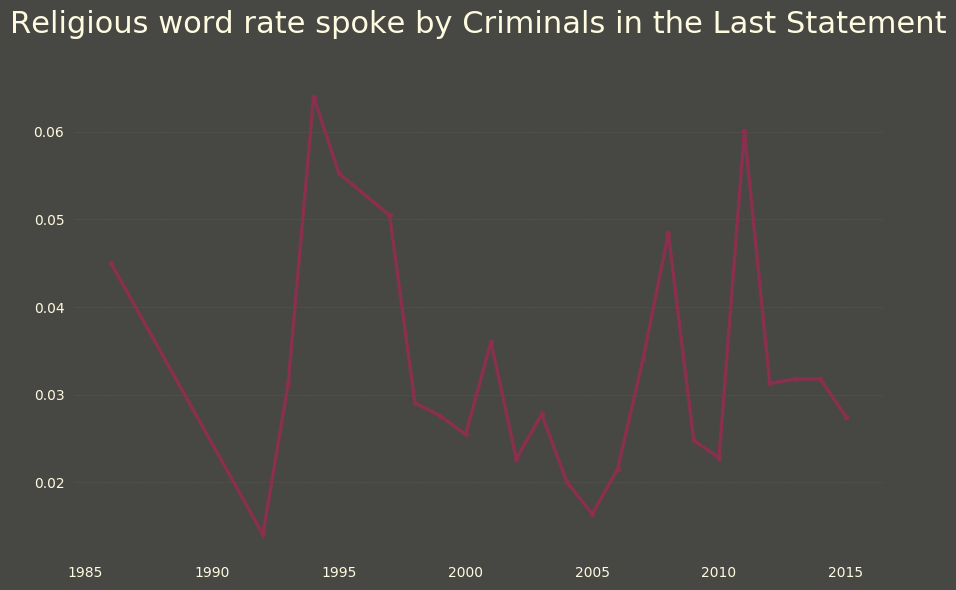

In [958]:
ax2 = df_religious_filter.plot(x='year', y='religious_word_per_wholewords',figsize=(10,6))
ax2.set_title("Religious word rate spoke by Criminals in the Last Statement", fontsize=22, pad=30, loc ='center', color='#fffbe0')

ax2.legend_.remove()
ax2.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax2.yaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
ax2.grid(False, axis='x')
ax2.tick_params(axis='x', colors='#fffbe0')
ax2.tick_params(axis='y', colors='#fffbe0')

plt.tight_layout()
plt.savefig('output2.pdf')
plt.show()

In [959]:
# result_sum = result.sum()
# length = math.sqrt(sum([x*x for x in result_sum]))
# result_vec = result_sum / length

In [960]:
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize)
matrix = vectorizer.fit_transform(df3['statement'])


result_all = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
result_all

,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,12:31b,13:13,...,younger,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [965]:
print_sorted_vector(result_all.iloc[0,:])

('muslim', 2)
('moment', 2)
('live', 2)
('life', 2)
('fear', 2)
('allah', 2)
('yes', 1)
('wanted', 1)
('tried', 1)
('taught', 1)
('statement', 1)
('since', 1)
('real', 1)
('purpose', 1)
('preparing', 1)
('power', 1)
('oneself', 1)
('media', 1)
('may', 1)
('material', 1)
('live.spoken', 1)
('happen', 1)
('god', 1)
('express', 1)
('die', 1)
('devout', 1)
('determine', 1)
('come', 1)
('body', 1)
('believe', 1)
('becoming', 1)
('absolutely', 1)
('…guys', 0)
('–to', 0)
('–eden', 0)
('zero', 0)
('zena', 0)
('youth', 0)
('yours.i', 0)
('youngsters', 0)
('youngster', 0)
('younger', 0)
('young', 0)
('you.warden', 0)
('you.to', 0)
('you.o.k', 0)
('you.i', 0)
('york', 0)
('yoli', 0)
('yolanda', 0)
('yields', 0)
('yet', 0)
('yesterday', 0)
('yellow', 0)
('years.i', 0)
('years', 0)
('yeah', 0)
('yea', 0)
('yaws', 0)
('yard', 0)
('yall', 0)
('yahweh', 0)
("ya'lls", 0)
("ya'll.to", 0)
("ya'll.i", 0)
("y'all", 0)
('wynona', 0)
('wrote', 0)
('wrongs', 0)
('wrongfully', 0)
('wronged', 0)
('wrong', 0)
('

[('muslim', 2),
 ('moment', 2),
 ('live', 2),
 ('life', 2),
 ('fear', 2),
 ('allah', 2),
 ('yes', 1),
 ('wanted', 1),
 ('tried', 1),
 ('taught', 1),
 ('statement', 1),
 ('since', 1),
 ('real', 1),
 ('purpose', 1),
 ('preparing', 1),
 ('power', 1),
 ('oneself', 1),
 ('media', 1),
 ('may', 1),
 ('material', 1),
 ('live.spoken', 1),
 ('happen', 1),
 ('god', 1),
 ('express', 1),
 ('die', 1),
 ('devout', 1),
 ('determine', 1),
 ('come', 1),
 ('body', 1),
 ('believe', 1),
 ('becoming', 1),
 ('absolutely', 1),
 ('…guys', 0),
 ('–to', 0),
 ('–eden', 0),
 ('zero', 0),
 ('zena', 0),
 ('youth', 0),
 ('yours.i', 0),
 ('youngsters', 0),
 ('youngster', 0),
 ('younger', 0),
 ('young', 0),
 ('you.warden', 0),
 ('you.to', 0),
 ('you.o.k', 0),
 ('you.i', 0),
 ('york', 0),
 ('yoli', 0),
 ('yolanda', 0),
 ('yields', 0),
 ('yet', 0),
 ('yesterday', 0),
 ('yellow', 0),
 ('years.i', 0),
 ('years', 0),
 ('yeah', 0),
 ('yea', 0),
 ('yaws', 0),
 ('yard', 0),
 ('yall', 0),
 ('yahweh', 0),
 ("ya'lls", 0),
 ("ya'l

In [966]:
# result_all_sum = result_all.sum()
# length = math.sqrt(sum([x*x for x in result_all_sum]))
# result_all_vec = result_all_sum / length

In [968]:
print_sorted_vector(result_all_vec)

('love', 0.5478034831032288)
('family', 0.25497502407803474)
('know', 0.24426178777223498)
('thank', 0.21497894186971558)
('sorry', 0.19712354802671594)
('would', 0.17712550692255635)
('want', 0.17712550692255635)
('god', 0.16855491787791654)
('say', 0.13998628772911711)
('life', 0.11570295210263762)
('hope', 0.11498873634891764)
('make', 0.11356030484147767)
('forgive', 0.10927501031915776)
('lord', 0.10856079456543777)
('statement', 0.10570393155055782)
('going', 0.10141863702823792)
('tell', 0.09927598976707797)
('last', 0.09927598976707797)
('people', 0.09427647949103807)
('take', 0.0921338322298781)
('see', 0.0878485377075582)
('peace', 0.0878485377075582)
('one', 0.0878485377075582)
('yes', 0.08499167469267825)
('offender', 0.07856373290919838)
('jesus', 0.07856373290919838)
('declined', 0.07713530140175842)
('warden', 0.07642108564803843)
('death', 0.07499265414059846)
('give', 0.0728500068794385)
('done', 0.06927892811083858)
('keep', 0.0678504966033986)
('let', 0.0664220650959

[('love', 0.5478034831032288),
 ('family', 0.25497502407803474),
 ('know', 0.24426178777223498),
 ('thank', 0.21497894186971558),
 ('sorry', 0.19712354802671594),
 ('would', 0.17712550692255635),
 ('want', 0.17712550692255635),
 ('god', 0.16855491787791654),
 ('say', 0.13998628772911711),
 ('life', 0.11570295210263762),
 ('hope', 0.11498873634891764),
 ('make', 0.11356030484147767),
 ('forgive', 0.10927501031915776),
 ('lord', 0.10856079456543777),
 ('statement', 0.10570393155055782),
 ('going', 0.10141863702823792),
 ('tell', 0.09927598976707797),
 ('last', 0.09927598976707797),
 ('people', 0.09427647949103807),
 ('take', 0.0921338322298781),
 ('see', 0.0878485377075582),
 ('peace', 0.0878485377075582),
 ('one', 0.0878485377075582),
 ('yes', 0.08499167469267825),
 ('offender', 0.07856373290919838),
 ('jesus', 0.07856373290919838),
 ('declined', 0.07713530140175842),
 ('warden', 0.07642108564803843),
 ('death', 0.07499265414059846),
 ('give', 0.0728500068794385),
 ('done', 0.0692789281

In [756]:
df_result_all = pd.DataFrame(print_sorted_vector(result_all_vec),columns=['word','tf'])

('love', 0.5478034831032288)
('family', 0.25497502407803474)
('know', 0.24426178777223498)
('thank', 0.21497894186971558)
('sorry', 0.19712354802671594)
('would', 0.17712550692255635)
('want', 0.17712550692255635)
('god', 0.16855491787791654)
('say', 0.13998628772911711)
('life', 0.11570295210263762)
('hope', 0.11498873634891764)
('make', 0.11356030484147767)
('forgive', 0.10927501031915776)
('lord', 0.10856079456543777)
('statement', 0.10570393155055782)
('going', 0.10141863702823792)
('tell', 0.09927598976707797)
('last', 0.09927598976707797)
('people', 0.09427647949103807)
('take', 0.0921338322298781)
('see', 0.0878485377075582)
('peace', 0.0878485377075582)
('one', 0.0878485377075582)
('yes', 0.08499167469267825)
('offender', 0.07856373290919838)
('jesus', 0.07856373290919838)
('declined', 0.07713530140175842)
('warden', 0.07642108564803843)
('death', 0.07499265414059846)
('give', 0.0728500068794385)
('done', 0.06927892811083858)
('keep', 0.0678504966033986)
('let', 0.0664220650959

In [757]:
df_result_all.to_csv("allword_tf.csv", index=False)

In [758]:
df_result = pd.read_csv("allword_tf.csv")
df_result = df_result.head(20)

In [759]:
df_result = df_result.sort_values(by='tf', ascending=True)
df_result

,word,tf
19,take,0.092134
18,people,0.094276
17,last,0.099276
16,tell,0.099276
15,going,0.101419
14,statement,0.105704
13,lord,0.108561
12,forgive,0.109275
11,make,0.113560
10,hope,0.114989


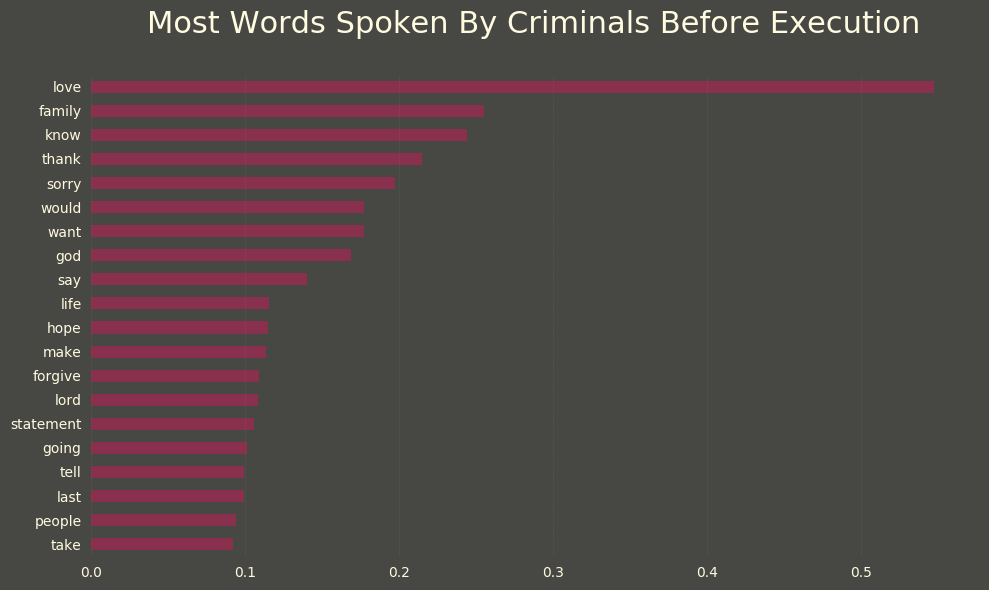

In [760]:
ax1 = df_result.plot(kind='barh', x= 'word', y='tf',figsize=(10,6))
ax1.set_title("Most Words Spoken By Criminals Before Execution", fontsize=22, pad=30, loc ='center', color='#fffbe0')
ax1.legend_.remove()
ax1.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax1.yaxis.label.set_visible(False)
ax1.grid(False, axis='y')
ax1.tick_params(axis='x', colors='#fffbe0')
ax1.tick_params(axis='y', colors='#fffbe0')

plt.tight_layout()
plt.savefig('output1.pdf')
plt.show()

In [ ]:
print_sorted_vector(result.iloc[1,:])

## Race with religious word

In [829]:
statement.tail()

,statement,age,firstname,lastname,race,year
548,I pray that my family will rejoice and will fo...,49,Doyle,Skillern,White,1985
549,"When asked if he had a last statement, he repl...",39,Thomas,Barefoot,White,1984
550,What is about to transpire in a few moments is...,39,Ronald,O'Bryan,White,1984
551,This offender declined to make a last statemen...,29,James,Autry,White,1984
552,"Statement to the Media: I, at this very moment...",40,Charlie,"Brooks, Jr.",Black,1982


In [830]:
number = statement.year.value_counts().reset_index().sort_values(by='index')

In [831]:
number = number.rename(columns= {'year':'number', 'index':'year'}).reset_index()

In [832]:
number = number.drop(['index'], axis=1)

In [833]:
number.head()

,year,number
0,1982,1
1,1984,3
2,1985,6
3,1986,10
4,1987,6


In [834]:
statement_all = statement.merge(number, left_on='year', right_on='year')

In [835]:
statement_all

,statement,age,firstname,lastname,race,year,number
0,l want to make sure the Patel family knows I l...,34,Christopher,Young,Black,2018,8
1,,66,Danny,Bible,White,2018,8
2,To everyone that has been there for me you kno...,37,Juan,Castillo,Hispanic,2018,8
3,"Yes, I would like to say nephew it burns huh....",31,Erick,Davila,Black,2018,8
4,First I would like to say I have been here s...,38,Rosendo,"Rodriguez, III",Histpanic,2018,8
5,"No, Well, Hi Mary Jean. See y’all later. Go a...",62,John,Battaglia,White,2018,8
6,First I would like to praise my Lord Jesus Ch...,64,William,Rayford,Black,2018,8
7,I’d like to take a moment to say I’m sorry. ...,55,Anthony,Shore,White,2018,8
8,"This is my statement: My final words. First,...",47,Ruben,Cardenas,Hispanic,2017,7
9,I just want to let everyone in here to know I ...,38,Robert,Pruett,White,2017,7


In [836]:
statement_all = statement_all[statement_all['number'] > 9]
statement_all

,statement,age,firstname,lastname,race,year,number
22,"Yes, I would like to thank all of my supporter...",36,Raphael,Holiday,Black,2015,13
23,"Shelby, God bless your heart. To my family, I...",33,Licho,Escamilla,Hispanic,2015,13
24,"(Spanish) To the Solano family, I want to tell...",35,Juan,Garcia,Hispanic,2015,13
25,“I would like to thank you. I hope this execu...,27,Daniel,Lopez,Hispanic,2015,13
26,"“Yes, I would like to thank my family and frie...",46,Gregory,Russeau,Black,2015,13
27,"""Much has been written about this case, not al...",67,Lester,Bower,White,2015,13
28,I'm ready to go home.,32,Derrick,Charles,Black,2015,13
29,"""Thank you for being here. I am sorry for all...",34,Manuel,Garza,Hispanic,2015,13
30,“I would like to apologize to the Moreno fami...,42,Kent,Sprouse,White,2015,13
31,"Yes sir, I want to say I love you to all my fa...",46,Manuel,Vasquez,Hispanic,2015,13


In [821]:
df1 = statement.groupby('year')['statement'].apply(' '.join).reset_index()

In [822]:
df1.head()

,year,statement
0,1982,"Statement to the Media: I, at this very moment..."
1,1984,"When asked if he had a last statement, he repl..."
2,1985,"D.J., Laurie, Dr. Wheat, about all I can say i..."
3,1986,This offender declined to make a last statemen...
4,1987,This offender declined to make a last statemen...


In [825]:
statement_all = df1.merge(number, left_on='year', right_on='year')
statement_all.head()

,year,statement,number
0,1982,"Statement to the Media: I, at this very moment...",1
1,1984,"When asked if he had a last statement, he repl...",3
2,1985,"D.J., Laurie, Dr. Wheat, about all I can say i...",6
3,1986,This offender declined to make a last statemen...,10
4,1987,This offender declined to make a last statemen...,6


In [826]:
statement_all = statement_all[statement_all['number'] > 9]

In [827]:
statement_all

,year,statement,number
3,1986,This offender declined to make a last statemen...,10
9,1992,This offender declined to make a last statemen...,12
10,1993,I want to express my feelings regarding the mi...,17
11,1994,…guys like them got tied up in something like ...,14
12,1995,This offender declined to make a last statemen...,19
14,1997,A lot of people view what is happening here as...,37
15,1998,"As the ocean always returns to itself, love al...",20
16,1999,Like to tell my friends that I love them. Appr...,35
17,2000,"To your family, ah, I hope that this can brin...",40
18,2001,Tell my family I love y'all. Watch out for Mom...,17


In [837]:
statement_all['race'].replace('His.*panic.*','Hispanic' , regex=True, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [838]:
statement_all['race'].replace('.*White.*','White' , regex=True, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [840]:
race = statement_all['race'].value_counts().reset_index().rename(columns={'race':'number', 'index':'race'})
race

,race,number
0,White,218
1,Black,184
2,Hispanic,92
3,Other,2


In [841]:
#race['number'] = race['number'].astype(str)

In [842]:
race = race.rename(columns={'race':'Race'})

In [843]:
statement_all.head()

,statement,age,firstname,lastname,race,year,number
22,"Yes, I would like to thank all of my supporter...",36,Raphael,Holiday,Black,2015,13
23,"Shelby, God bless your heart. To my family, I...",33,Licho,Escamilla,Hispanic,2015,13
24,"(Spanish) To the Solano family, I want to tell...",35,Juan,Garcia,Hispanic,2015,13
25,“I would like to thank you. I hope this execu...,27,Daniel,Lopez,Hispanic,2015,13
26,"“Yes, I would like to thank my family and frie...",46,Gregory,Russeau,Black,2015,13


In [845]:
statement_all = statement_all.rename(columns={'race':'Race'})

In [846]:
df_race = statement_all.groupby('Race')['statement'].apply(' '.join).reset_index()
df_race.head()

,Race,statement
0,Black,"Yes, I would like to thank all of my supporter..."
1,Hispanic,"Shelby, God bless your heart. To my family, I..."
2,Other,I am so glad I found God and I am so happy for...
3,White,"""Much has been written about this case, not al..."


In [847]:
race_result = race.merge(df_race, right_on='Race', left_on='Race')
#race_result = race_result.rename(columns={'race':'Race'})

In [848]:
race_result

,Race,number,statement
0,White,218,"""Much has been written about this case, not al..."
1,Black,184,"Yes, I would like to thank all of my supporter..."
2,Hispanic,92,"Shelby, God bless your heart. To my family, I..."
3,Other,2,I am so glad I found God and I am so happy for...


In [849]:
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize)
matrix = vectorizer.fit_transform(race_result['statement'])


result_race = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
result_race

,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,12:31b,13:13,...,younger,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys
0,1,3,0,1,1,1,0,0,1,1,...,1,1,0,0,1,0,2,1,1,1
1,1,0,1,0,2,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [850]:
result = pd.concat([race_result, result_race], axis=1, join_axes=[race_result.index])

In [851]:
result.drop(columns=['statement'], inplace=True)

In [852]:
result

,Race,number,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,...,younger,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys
0,White,218,1,3,0,1,1,1,0,0,...,1,1,0,0,1,0,2,1,1,1
1,Black,184,1,0,1,0,2,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,Hispanic,92,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Other,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [853]:
result.shape

(4, 3200)

In [862]:
vectorizer = CountVectorizer(stop_words=stop, tokenizer=tokenize, vocabulary = ['god', 'jesus', 'christ', 'holy', 'allah', 'lord'])
matrix = vectorizer.fit_transform(race_result['statement'])


result_race_religious = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
result_race_religious 

,god,jesus,christ,holy,allah,lord
0,99,56,27,1,2,76
1,65,28,23,1,25,42
2,52,18,7,22,7,23
3,3,1,0,0,0,3


In [863]:
race_religious = pd.concat([race_result, result_race_religious], axis=1, join_axes=[race_result.index])

In [864]:
race_religious.drop(columns=['statement'], inplace=True)

In [865]:
#race_religious = race_religious.rename(columns={'race':'Race'})

In [866]:
race_religious

,Race,number,god,jesus,christ,holy,allah,lord
0,White,218,99,56,27,1,2,76
1,Black,184,65,28,23,1,25,42
2,Hispanic,92,52,18,7,22,7,23
3,Other,2,3,1,0,0,0,3


In [867]:
race_religious['religious_sum'] = race_religious.sum(axis=1)
race_religious

,Race,number,god,jesus,christ,holy,allah,lord,religious_sum
0,White,218,99,56,27,1,2,76,479
1,Black,184,65,28,23,1,25,42,368
2,Hispanic,92,52,18,7,22,7,23,221
3,Other,2,3,1,0,0,0,3,9


In [869]:
race_nonreligious = result_race.drop(['god', 'jesus', 'christ', 'holy', 'allah', 'lord'], axis=1)

In [870]:
race_nonreligious

,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,12:31b,13:13,...,younger,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys
0,1,3,0,1,1,1,0,0,1,1,...,1,1,0,0,1,0,2,1,1,1
1,1,0,1,0,2,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [871]:
race_nonreligious['nonreligious_sum'] = race_nonreligious.sum(axis=1)

In [872]:
#race_nonreligious = race_nonreligious.rename(columns={'race':'Race'})

In [873]:
race_nonreligious

,'cause,'em,01/09/06,1.7,100,10:9,10th,12:19,12:31b,13:13,...,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys,nonreligious_sum
0,1,3,0,1,1,1,0,0,1,1,...,1,0,0,1,0,2,1,1,1,8255
1,1,0,1,0,2,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,6901
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3274
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37


In [874]:
race_word = pd.concat([race_religious,race_nonreligious], axis=1, join_axes=[race_religious.index])

In [875]:
race_word

,Race,number,god,jesus,christ,holy,allah,lord,religious_sum,'cause,...,youngster,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys,nonreligious_sum
0,White,218,99,56,27,1,2,76,479,1,...,1,0,0,1,0,2,1,1,1,8255
1,Black,184,65,28,23,1,25,42,368,1,...,0,0,1,0,1,0,0,0,0,6901
2,Hispanic,92,52,18,7,22,7,23,221,1,...,0,1,0,0,0,0,0,0,0,3274
3,Other,2,3,1,0,0,0,3,9,0,...,0,0,0,0,0,0,0,0,0,37


In [876]:
race_word['race_word_religious_ratio'] = race_word['religious_sum']/ (race_word['nonreligious_sum'] + race_word['religious_sum'])

In [877]:
race_word['race_word_religious_ratio']

0    0.054843
1    0.050626
2    0.063233
3    0.195652
Name: race_word_religious_ratio, dtype: float64

In [878]:
race_word['number']

0    218
1    184
2     92
3      2
Name: number, dtype: int64

In [879]:
# race_word['religious_world_per_person'] = race_word['religious_sum'] / race_word['number']

In [880]:
race_word

,Race,number,god,jesus,christ,holy,allah,lord,religious_sum,'cause,...,youngsters,yours.i,youth,zena,zero,–eden,–to,…guys,nonreligious_sum,race_word_religious_ratio
0,White,218,99,56,27,1,2,76,479,1,...,0,0,1,0,2,1,1,1,8255,0.054843
1,Black,184,65,28,23,1,25,42,368,1,...,0,1,0,1,0,0,0,0,6901,0.050626
2,Hispanic,92,52,18,7,22,7,23,221,1,...,1,0,0,0,0,0,0,0,3274,0.063233
3,Other,2,3,1,0,0,0,3,9,0,...,0,0,0,0,0,0,0,0,37,0.195652


In [881]:
race_word = race_word[['Race','number', 'religious_sum', 'nonreligious_sum','race_word_religious_ratio']]

In [882]:
race_word = race_word.drop(race_word.index[3])

In [883]:
race_word

,Race,number,religious_sum,nonreligious_sum,race_word_religious_ratio
0,White,218,479,8255,0.054843
1,Black,184,368,6901,0.050626
2,Hispanic,92,221,3274,0.063233


In [884]:
race_word.dtypes

Race                          object
number                         int64
religious_sum                  int64
nonreligious_sum               int64
race_word_religious_ratio    float64
dtype: object

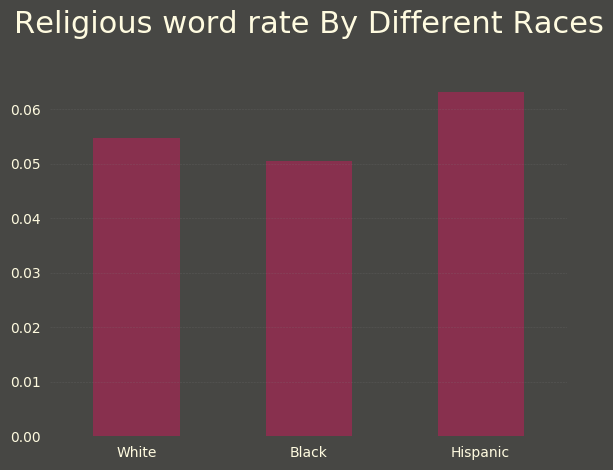

In [895]:
ax3 = race_word.plot(x='Race', y='race_word_religious_ratio', kind='bar')

ax3.set_title("Religious word rate By Different Races", fontsize=22, pad=30, loc ='center', color='#fffbe0')
ax3.legend_.remove()
ax3.tick_params(which='major', left=False, bottom=False, top=False, grid_alpha=0.3)
ax3.yaxis.label.set_visible(False)
ax3.xaxis.label.set_visible(False)
ax3.grid(False, axis='x')
ax3.tick_params(axis='x', colors='#fffbe0')
ax3.tick_params(axis='y', colors='#fffbe0')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('output4.pdf')
plt.show()

In [969]:
statement.head()

,statement,age,firstname,lastname,race,year
0,l want to make sure the Patel family knows I l...,34,Christopher,Young,Black,2018
1,,66,Danny,Bible,White,2018
2,To everyone that has been there for me you kno...,37,Juan,Castillo,Hispanic,2018
3,"Yes, I would like to say nephew it burns huh....",31,Erick,Davila,Black,2018
4,First I would like to say I have been here s...,38,Rosendo,"Rodriguez, III",Histpanic,2018


In [973]:
statement_all.head()

,statement,age,firstname,lastname,Race,year,number
22,"Yes, I would like to thank all of my supporter...",36,Raphael,Holiday,Black,2015,13
23,"Shelby, God bless your heart. To my family, I...",33,Licho,Escamilla,Hispanic,2015,13
24,"(Spanish) To the Solano family, I want to tell...",35,Juan,Garcia,Hispanic,2015,13
25,“I would like to thank you. I hope this execu...,27,Daniel,Lopez,Hispanic,2015,13
26,"“Yes, I would like to thank my family and frie...",46,Gregory,Russeau,Black,2015,13
